<a href="https://colab.research.google.com/github/alaminsayed/pytorch-project/blob/main/04_pytorch_custom_dataset_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 Importing pytorch and setting up device-agnostic code

In [ ]:
import torch
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# 1. Get data
First things first we need some data.

And like any good cooking show, some data has already been prepared for us.

We're going to start small.

Because we're not looking to train the biggest model or use the biggest dataset yet.

Machine learning is an iterative process, start small, get something working and increase when necessary.

The data we're going to be using is a subset of the Food101 dataset.

Food101 is popular computer vision benchmark as it contains 1000 images of 101 different kinds of foods, totaling 101,000 images (75,750 train and 25,250 test).

Can you think of 101 different foods?

Can you think of a computer program to classify 101 foods?

I can.

A machine learning model!

Specifically, a PyTorch computer vision model like we covered in notebook 03.

Instead of 101 food classes though, we're going to start with 3: pizza, steak and sushi.

And instead of 1,000 images per class, we're going to start with a random 10% (start small, increase when necessary).

If you'd like to see where the data came from you see the following resources:

Original Food101 dataset and paper website.
torchvision.datasets.Food101 - the version of the data I downloaded for this notebook.
extras/04_custom_data_creation.ipynb - a notebook I used to format the Food101 dataset to use for this notebook.
data/pizza_steak_sushi.zip - the zip archive of pizza, steak and sushi images from Food101, created with the notebook linked above.
Let's write some code to download the formatted data from GitHub.

In [ ]:
import requests
import zipfile
from pathlib import Path
# setup path to a data folder
data_path = Path("data/")
image_path = data_path/"pizza_steak_sushi"
# if the image folder doesnot exist ,download it and prepare it..
if image_path.is_dir():
  print(f"{image_path} directory already exists..")
else :
  print(f"{image_path} does not exist , creating one")
  image_path.mkdir(parents=True,exist_ok=True)

# Download pizza ,steak, and sushi data
with open(data_path/ "pizza_steak_sushi.zip","wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)
 # unzip pizza,steak and sushi data
with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip","r") as zip_ref:
  print("Unzipping pizza, steak, sushi data...")
  zip_ref.extractall(image_path)


data/pizza_steak_sushi does not exist , creating one
Unzipping pizza, steak, sushi data...


## 2. Becoming one with the data(data preparation and data exploration)

In [ ]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.


In [ ]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

# 2.1 Visualize an image


Random image path: data/pizza_steak_sushi/train/steak/3074367.jpg
Image class: steak
Image height: 339
Image width: 512


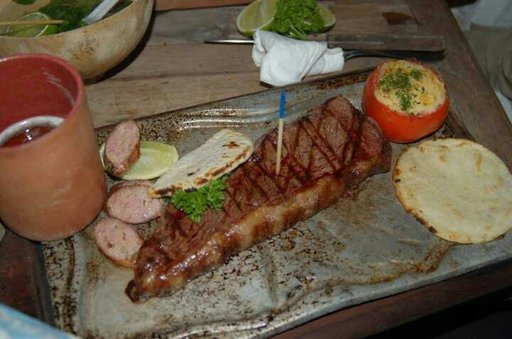

In [ ]:
import random
from PIL import Image
# set seed
#random.seed(42)
# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. select random image path
random_image_path= random.choice(image_path_list)
# 3.get image class from path name the image class is the name of the directory where the image is stored
image_class = random_image_path.parent.stem
# 4. open image
img= Image.open(random_image_path)
# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img



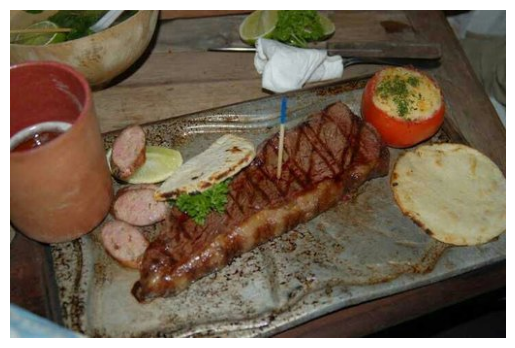

In [ ]:
# prompt: visualize an random image with matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Assuming 'img' from the provided code is the PIL Image object
img_array = np.array(img)  # Convert PIL Image to NumPy array

plt.imshow(img_array)
plt.axis("off")  # Turn off axis ticks and labels
plt.show()

# 3 Transforming data

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets ,transforms

# 3.1 Transforming data with `torchvision.transforms`
transformed_image = transform(f).permute(1, 2, 0) its important

In [ ]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

In [ ]:
data_transform(img)

tensor([[[0.5137, 0.4235, 0.2392,  ..., 0.3843, 0.3804, 0.3451],
         [0.4706, 0.4196, 0.4000,  ..., 0.3765, 0.3686, 0.3255],
         [0.4314, 0.4196, 0.4000,  ..., 0.3765, 0.3529, 0.3294],
         ...,
         [0.4353, 0.4902, 0.5176,  ..., 0.0549, 0.0471, 0.0471],
         [0.5412, 0.4706, 0.4863,  ..., 0.0549, 0.0471, 0.0431],
         [0.6353, 0.4941, 0.4510,  ..., 0.0549, 0.0510, 0.0431]],

        [[0.4392, 0.3686, 0.2588,  ..., 0.4314, 0.4275, 0.3922],
         [0.4118, 0.3725, 0.3608,  ..., 0.4235, 0.4157, 0.3725],
         [0.3765, 0.3686, 0.3569,  ..., 0.4235, 0.3961, 0.3765],
         ...,
         [0.5843, 0.6235, 0.6353,  ..., 0.0549, 0.0471, 0.0471],
         [0.6471, 0.6078, 0.6275,  ..., 0.0549, 0.0471, 0.0431],
         [0.7176, 0.6392, 0.6275,  ..., 0.0549, 0.0510, 0.0431]],

        [[0.2980, 0.2275, 0.1020,  ..., 0.4314, 0.4275, 0.3922],
         [0.2902, 0.2392, 0.2157,  ..., 0.4235, 0.4157, 0.3725],
         [0.2627, 0.2314, 0.2039,  ..., 0.4235, 0.4000, 0.

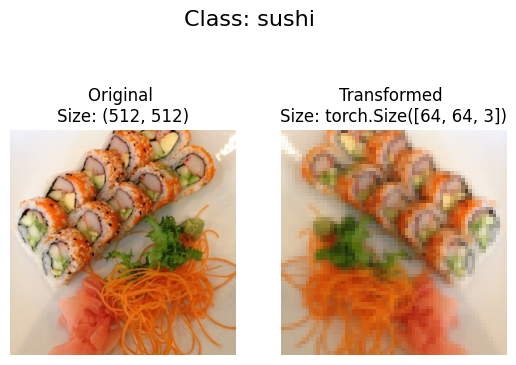

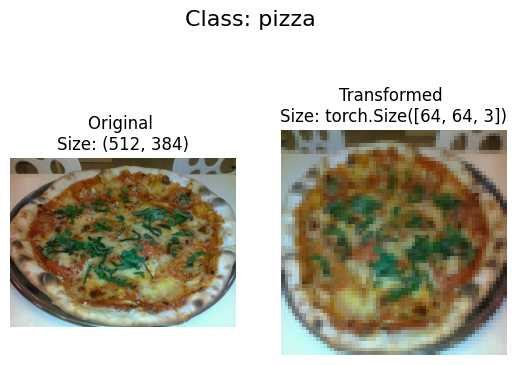

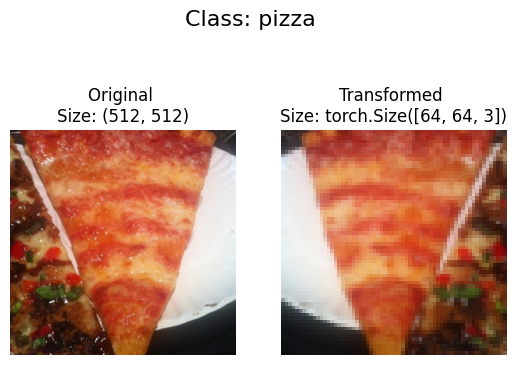

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

## 4. option 1 : Loading image data using `ImageFloder`

In [ ]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [ ]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


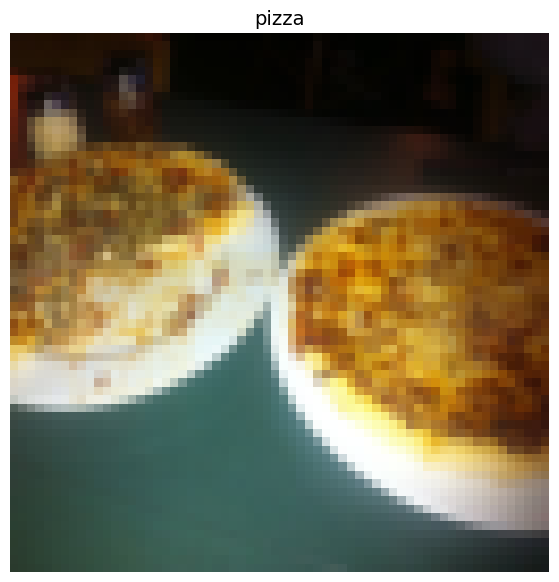

In [ ]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

## 4.1 Turn loaded images into ` Dataloader's`

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 1

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
                              batch_size=BATCH_SIZE, # how many samples per batch?
                              shuffle=True,
                              num_workers=1 # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
                            num_workers=1 # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7b703d5ace50>, <torch.utils.data.dataloader.DataLoader object at 0x7b703d5ae3b0>)
Length of train dataloader: 225 batches of 1
Length of test dataloader: 75 batches of 1


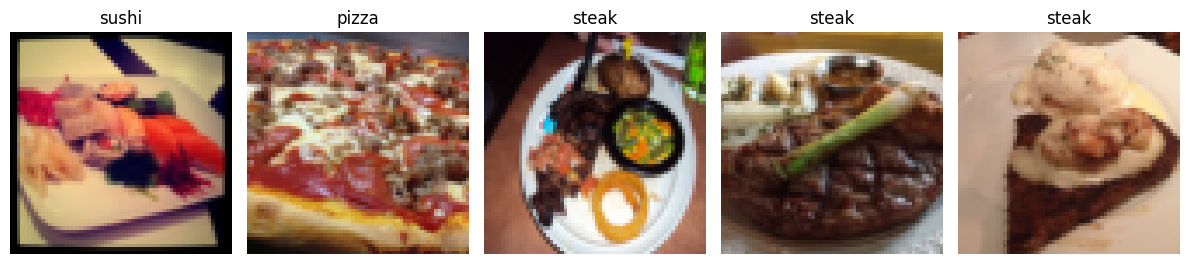

In [ ]:
# prompt: plot 5 image with label from dataloader

import matplotlib.pyplot as plt

# Assuming train_dataloader is already defined from the previous code

def plot_images_from_dataloader(dataloader, n_images=5):
    """Plots n_images from the given dataloader."""
    fig, axes = plt.subplots(1, n_images, figsize=(12, 4))
    for i, (images, labels) in enumerate(dataloader):
        if i >= n_images:
            break
        axes[i].imshow(images[0].permute(1, 2, 0))  # Permute to [H, W, C]
        axes[i].set_title(class_names[labels[0]])
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

plot_images_from_dataloader(train_dataloader)